In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"/content/drive/MyDrive/datasets_all/scores_data.csv")

In [3]:
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [5]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [7]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


In [9]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [13]:
df.columns=df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [10]:
df["Batch "].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [14]:
import pandas as pd

df["Score_Obtained"] = df["Score"].str.split("/").str[0].astype(int)
df["Score_Total"] = df["Score"].str.split("/").str[1].astype(int)
df["Score_Percentage"] = (df["Score_Obtained"] / df["Score_Total"]) * 100

In [15]:
df.groupby("Batch")["Score_Obtained"].describe()

,count,mean,std,min,25%,50%,75%,max
Batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


**AI_ELITE_7 is the top-performing batch, showing higher average scores and no extremely weak performers.**

**AI_ELITE_6 performs moderately, with both high and low performers, showing mixed ability.**

**AI_ELITE_4 has the lowest performance, with many students scoring below average and a number of very weak performers**

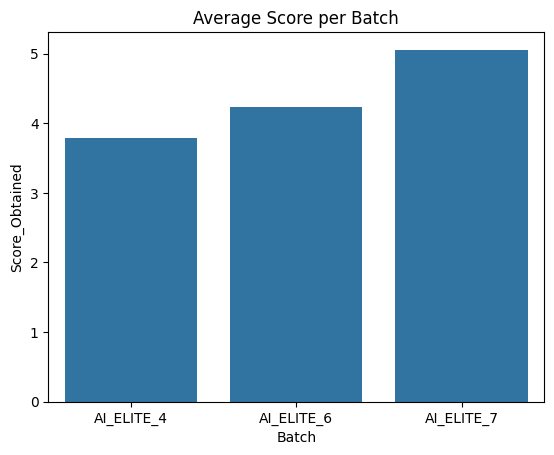

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_scores = df.groupby("Batch")["Score_Obtained"].mean().reset_index()
sns.barplot(data=avg_scores, x="Batch", y="Score_Obtained")
plt.title("Average Score per Batch")
plt.show()

**AI_ELITE_7 is the top-performing batch, showing higher average scores and no extremely weak performers.**

**AI_ELITE_6 performs moderately, with both high and low performers, showing mixed ability.**

**AI_ELITE_4 has the lowest performance, with many students scoring below average and a number of very weak performers**

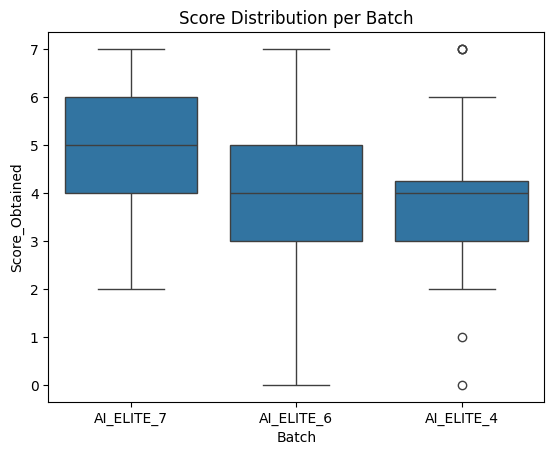

In [17]:
sns.boxplot(data=df, x="Batch", y="Score_Obtained")
plt.title("Score Distribution per Batch")
plt.show()


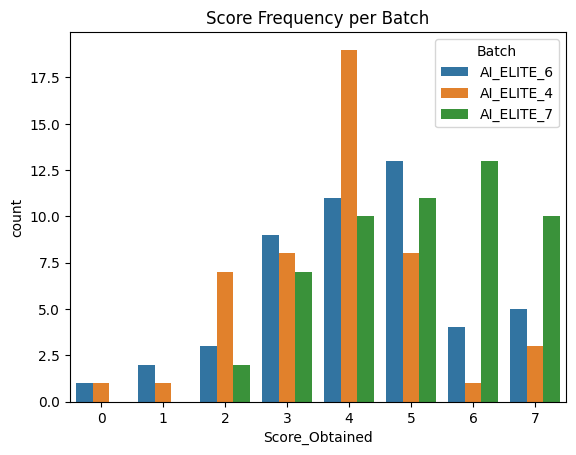

In [18]:
sns.countplot(data=df, x="Score_Obtained", hue="Batch")
plt.title("Score Frequency per Batch")
plt.show()

In [20]:
print("Average Score by Batch")
print(df.groupby("Batch")["Score_Obtained"].mean())


Average Score by Batch
Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score_Obtained, dtype: float64


In [21]:
print("Median Score by Batch")
print(df.groupby("Batch")["Score_Obtained"].median())


Median Score by Batch
Batch
AI_ELITE_4    4.0
AI_ELITE_6    4.0
AI_ELITE_7    5.0
Name: Score_Obtained, dtype: float64


In [22]:
print("Score Consistency (Std Dev) by Batch")
print(df.groupby("Batch")["Score_Obtained"].std())


Score Consistency (Std Dev) by Batch
Batch
AI_ELITE_4    1.443376
AI_ELITE_6    1.640441
AI_ELITE_7    1.446682
Name: Score_Obtained, dtype: float64


In [23]:
bivariate_perf = df.groupby("Batch")["Score_Obtained"].agg(
    high_performers = lambda x: (x >= 6).sum(),
    moderate = lambda x: ((x >= 4) & (x < 6)).sum(),
    low_performers = lambda x: (x <= 3).sum()
)

print(bivariate_perf)


            high_performers  moderate  low_performers
Batch                                                
AI_ELITE_4                4        27              17
AI_ELITE_6                9        24              15
AI_ELITE_7               23        21               9


In [24]:
print(df.groupby("Batch")["Score_Percentage"].describe())


            count       mean        std        min        25%        50%  \
Batch                                                                      
AI_ELITE_4   48.0  54.166667  20.619652   0.000000  42.857143  57.142857   
AI_ELITE_6   48.0  60.416667  23.434869   0.000000  42.857143  57.142857   
AI_ELITE_7   53.0  72.237197  20.666883  28.571429  57.142857  71.428571   

                  75%    max  
Batch                         
AI_ELITE_4  60.714286  100.0  
AI_ELITE_6  71.428571  100.0  
AI_ELITE_7  85.714286  100.0  


In [25]:
summary = df.groupby("Batch").agg(
    mean_score = ("Score_Obtained","mean"),
    median_score = ("Score_Obtained","median"),
    std_dev = ("Score_Obtained","std"),
    min_score = ("Score_Obtained","min"),
    max_score = ("Score_Obtained","max"),
    count = ("User_ID","count")
)

print(summary)


            mean_score  median_score   std_dev  min_score  max_score  count
Batch                                                                      
AI_ELITE_4    3.791667           4.0  1.443376          0          7     48
AI_ELITE_6    4.229167           4.0  1.640441          0          7     48
AI_ELITE_7    5.056604           5.0  1.446682          2          7     53


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

/tmp/ipython-input-3180691475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Batch", y="Score_Percentage", palette="rocket")


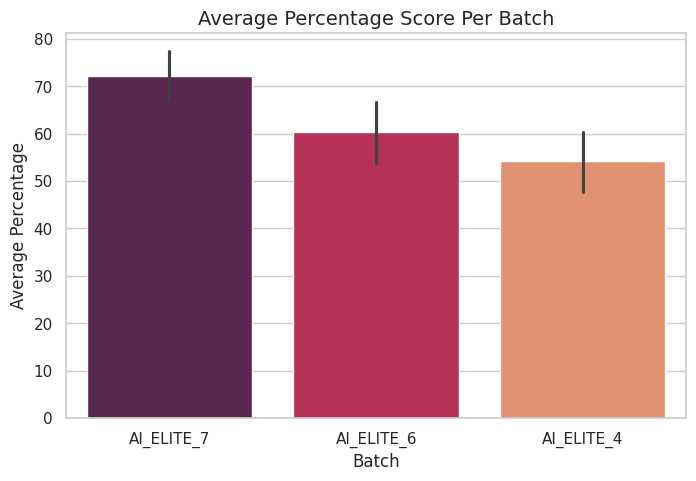

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Batch", y="Score_Percentage", palette="rocket")
plt.title("Average Percentage Score Per Batch", fontsize=14)
plt.xlabel("Batch")
plt.ylabel("Average Percentage")
plt.show()


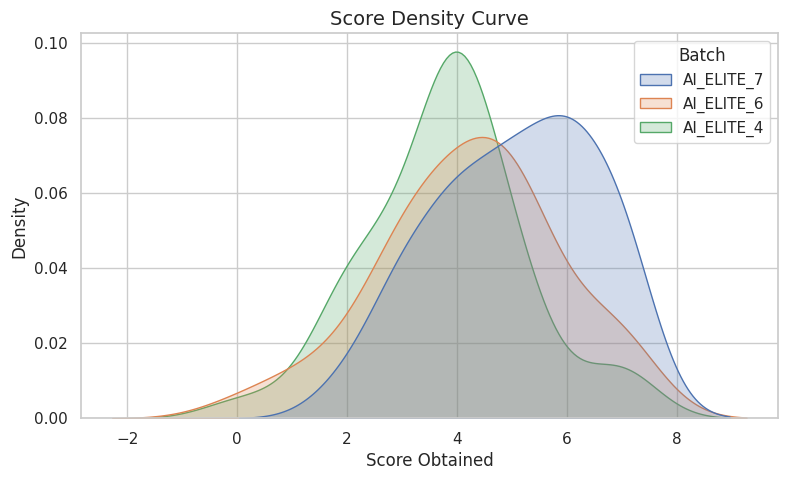

In [31]:
plt.figure(figsize=(9,5))
sns.kdeplot(data=df, x="Score_Obtained", hue="Batch", fill=True)
plt.title("Score Density Curve", fontsize=14)
plt.xlabel("Score Obtained")
plt.ylabel("Density")
plt.show()
